<a href="https://colab.research.google.com/github/thayeylolu/cyberbullying/blob/main/notebooks/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [40]:
import pandas as pd
import numpy as np
import nltk
import json

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from collections import Counter

from nltk.probability import FreqDist
from wordcloud import WordCloud
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
warnings.filterwarnings(action="ignore")
%matplotlib inline

### Mount Drive

In [59]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load Data

In [42]:
url = "drive/MyDrive/NLP/clean_df.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0,tweet_text,cyberbullying_type,profanity_list,hashtags,mentions,emoji_names,clean_txt,clean_txt_emoji,tokenized,pos_tags,wordnet_pos,lemmatized
0,0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,NaN,katandandre mkr,NaN,NaN,"In other words , your food was crapilicious!",words food crapilicious katandandre mkr,"['words', 'food', 'crapilicious']","[('words', 'NNS'), ('food', 'NN'), ('crapilicious', 'JJ')]","[('words', 'n'), ('food', 'n'), ('crapilicious', 'a')]","['word', 'food', 'crapilicious']"
1,1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,NaN,aussietv MKR theblock ImACelebrityAU today sunrise studio10 Neighbours WonderlandTen etc,NaN,NaN,Why white?,white aussietv MKR theblock ImACelebrityAU today sunrise studio10 Neighbours WonderlandTen etc,['white'],"[('white', 'JJ')]","[('white', 'a')]",['white']
2,2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,NaN,NaN,XochitlSuckkks,NaN,classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcakes,"['classy', 'whore', 'red', 'velvet', 'cupcakes']","[('classy', 'NN'), ('whore', 'NN'), ('red', 'JJ'), ('velvet', 'NN'), ('cupcakes', 'NNS')]","[('classy', 'n'), ('whore', 'n'), ('red', 'a'), ('velvet', 'n'), ('cupcakes', 'n')]","['classy', 'whore', 'red', 'velvet', 'cupcake']"
3,3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,NaN,NaN,Jason_Gio,NaN,"meh. :P thanks for the heads up, but not too concerned about another angry dude twitter.",meh thanks heads concerned another angry dude twitter,"['meh', 'thanks', 'heads', 'concerned', 'another', 'angry', 'dude', 'twitter']","[('meh', 'JJ'), ('thanks', 'NNS'), ('heads', 'NNS'), ('concerned', 'VBD'), ('another', 'DT'), ('...","[('meh', 'a'), ('thanks', 'n'), ('heads', 'n'), ('concerned', 'v'), ('another', 'n'), ('angry', ...","['meh', 'thanks', 'head', 'concern', 'another', 'angry', 'dude', 'twitter']"
4,4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,NaN,NaN,RudhoeEnglish,NaN,"This ISIS account pretending Kurdish account. Like Islam, all lies.",isis account pretending kurdish account like islam lies,"['isis', 'account', 'pretending', 'kurdish', 'account', 'like', 'islam', 'lies']","[('isis', 'NN'), ('account', 'NN'), ('pretending', 'VBG'), ('kurdish', 'JJ'), ('account', 'NN'),...","[('isis', 'n'), ('account', 'n'), ('pretending', 'v'), ('kurdish', 'a'), ('account', 'n'), ('lik...","['isi', 'account', 'pretend', 'kurdish', 'account', 'like', 'islam', 'lie']"


### Cyber Bullying Class Distribution

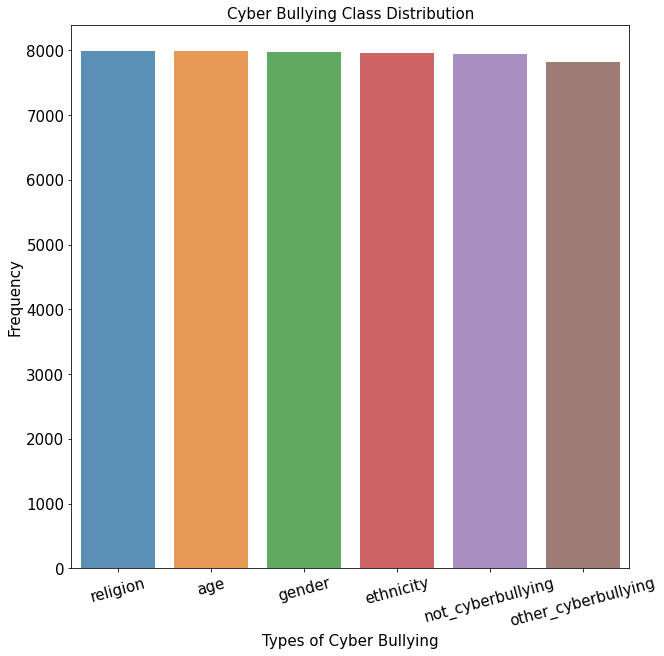

In [43]:
cyber_bull = df['cyberbullying_type'].value_counts()
index = cyber_bull.sort_index()
plt.figure(figsize=(10,10))

sns.barplot(cyber_bull.index, cyber_bull.values, alpha=0.8)
plt.title("Cyber Bullying Class Distribution", fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Types of Cyber Bullying', fontsize=15)
plt.xticks(fontsize=15,rotation =15);

### Cleaning Profanity List

In [44]:
df['profanity_list'] = df['profanity_list'].astype(str)
df['profanity_list'] = df['profanity_list'].replace('nan', "").str.split(" ").astype(str)

df.sample(3)

,Unnamed: 0,tweet_text,cyberbullying_type,profanity_list,hashtags,mentions,emoji_names,clean_txt,clean_txt_emoji,tokenized,pos_tags,wordnet_pos,lemmatized
17623,17623,RT @ha_bibti: MT @aaronstein1: #Turkey is now the only major (Muslim majority) country in the Mi...,religion,['bombing'],Turkey ISIS,ha_bibti aaronstein1,NaN,RT : MT : now the only major (Muslim majority) country the Middle East that not bombing,major muslim majority country middle east bombing Turkey ISIS,"['major', 'muslim', 'majority', 'country', 'middle', 'east', 'bombing']","[('major', 'JJ'), ('muslim', 'NNS'), ('majority', 'NN'), ('country', 'NN'), ('middle', 'VBD'), (...","[('major', 'a'), ('muslim', 'n'), ('majority', 'n'), ('country', 'n'), ('middle', 'v'), ('east',...","['major', 'muslim', 'majority', 'country', 'middle', 'east', 'bombing']"
25256,25256,"Really, really, really want to go to Blizzcon, but not sure how I'm going to afford it this year.:(",other_cyberbullying,[''],NaN,NaN,NaN,"Really, really, really want go Blizzcon, but not sure how I going afford this year.:(",really really really want blizzcon sure going afford year,"['really', 'really', 'really', 'want', 'blizzcon', 'sure', 'going', 'afford', 'year']","[('really', 'RB'), ('really', 'RB'), ('really', 'RB'), ('want', 'JJ'), ('blizzcon', 'NN'), ('sur...","[('really', 'r'), ('really', 'r'), ('really', 'r'), ('want', 'a'), ('blizzcon', 'n'), ('sure', '...","['really', 'really', 'really', 'want', 'blizzcon', 'sure', 'go', 'afford', 'year']"
32234,32234,"My friends told me that in their high school, a guy with autism was bullied by 3 girls. Those gi...",age,[''],NaN,NaN,NaN,"My friends told that their high school, guy with autism was bullied 3 girls. Those girls deserve...",friends told high school guy autism bullied girls girls deserves expelled suspended days only be...,"['friends', 'told', 'high', 'school', 'guy', 'autism', 'bullied', 'girls', 'girls', 'deserves', ...","[('friends', 'NNS'), ('told', 'VBD'), ('high', 'JJ'), ('school', 'NN'), ('guy', 'NN'), ('autism'...","[('friends', 'n'), ('told', 'v'), ('high', 'a'), ('school', 'n'), ('guy', 'n'), ('autism', 'n'),...","['friend', 'tell', 'high', 'school', 'guy', 'autism', 'bully', 'girls', 'girl', 'deserves', 'exp..."


In [45]:
df[df['profanity_list'] == "['']"]

,Unnamed: 0,tweet_text,cyberbullying_type,profanity_list,hashtags,mentions,emoji_names,clean_txt,clean_txt_emoji,tokenized,pos_tags,wordnet_pos,lemmatized
0,0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying,[''],katandandre mkr,NaN,NaN,"In other words , your food was crapilicious!",words food crapilicious katandandre mkr,"['words', 'food', 'crapilicious']","[('words', 'NNS'), ('food', 'NN'), ('crapilicious', 'JJ')]","[('words', 'n'), ('food', 'n'), ('crapilicious', 'a')]","['word', 'food', 'crapilicious']"
1,1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours ...,not_cyberbullying,[''],aussietv MKR theblock ImACelebrityAU today sunrise studio10 Neighbours WonderlandTen etc,NaN,NaN,Why white?,white aussietv MKR theblock ImACelebrityAU today sunrise studio10 Neighbours WonderlandTen etc,['white'],"[('white', 'JJ')]","[('white', 'a')]",['white']
2,2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying,[''],NaN,XochitlSuckkks,NaN,classy whore? Or more red velvet cupcakes?,classy whore red velvet cupcakes,"['classy', 'whore', 'red', 'velvet', 'cupcakes']","[('classy', 'NN'), ('whore', 'NN'), ('red', 'JJ'), ('velvet', 'NN'), ('cupcakes', 'NNS')]","[('classy', 'n'), ('whore', 'n'), ('red', 'a'), ('velvet', 'n'), ('cupcakes', 'n')]","['classy', 'whore', 'red', 'velvet', 'cupcake']"
3,3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on t...",not_cyberbullying,[''],NaN,Jason_Gio,NaN,"meh. :P thanks for the heads up, but not too concerned about another angry dude twitter.",meh thanks heads concerned another angry dude twitter,"['meh', 'thanks', 'heads', 'concerned', 'another', 'angry', 'dude', 'twitter']","[('meh', 'JJ'), ('thanks', 'NNS'), ('heads', 'NNS'), ('concerned', 'VBD'), ('another', 'DT'), ('...","[('meh', 'a'), ('thanks', 'n'), ('heads', 'n'), ('concerned', 'v'), ('another', 'n'), ('angry', ...","['meh', 'thanks', 'head', 'concern', 'another', 'angry', 'dude', 'twitter']"
4,4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is al...",not_cyberbullying,[''],NaN,RudhoeEnglish,NaN,"This ISIS account pretending Kurdish account. Like Islam, all lies.",isis account pretending kurdish account like islam lies,"['isis', 'account', 'pretending', 'kurdish', 'account', 'like', 'islam', 'lies']","[('isis', 'NN'), ('account', 'NN'), ('pretending', 'VBG'), ('kurdish', 'JJ'), ('account', 'NN'),...","[('isis', 'n'), ('account', 'n'), ('pretending', 'v'), ('kurdish', 'a'), ('account', 'n'), ('lik...","['isi', 'account', 'pretend', 'kurdish', 'account', 'like', 'islam', 'lie']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47673,47673,"“@ranran_42: EVERYONE STAYS HATIN SORRY I LIKE TO BE HAPPY &amp; BLAST CHRISTMAS MUSIC, ITS BETT...",ethnicity,[''],NaN,ranran_42,NaN,"“: EVERYONE STAYS HATIN SORRY I LIKE TO BE HAPPY &amp; BLAST CHRISTMAS MUSIC, ITS BETTER THAN YO...",everyone stays hatin sorry like happy amp blast christmas music better dumb nigger shit fuck,"['everyone', 'stays', 'hatin', 'sorry', 'like', 'happy', 'amp', 'blast', 'christmas', 'music', '...","[('everyone', 'NN'), ('stays', 'VBZ'), ('hatin', 'VBP'), ('sorry', 'NN'), ('like', 'IN'), ('happ...","[('everyone', 'n'), ('stays', 'v'), ('hatin', 'v'), ('sorry', 'n'), ('like', 'n'), ('happy', 'a'...","['everyone', 'stay', 'hatin', 'sorry', 'like', 'happy', 'amp', 'blast', 'christmas', 'music', 'w..."
47680,47680,"So a random Iowa fan pulls up in his car and sees me in a Michigan State shirt and says, "" Fuck ...",ethnicity,[''],NaN,NaN,NaN,"So random Iowa fan pulls his car and sees Michigan State shirt and says, "" Fuck you and Michigan...",random iowa fan pulls car sees michigan state shirt says fuck michigan state dumb nigger,"['random', 'iowa', 'fan', 'pulls', 'car', 'sees', 'michigan', 'state', 'shirt', 'says', 'fuck', ...","[('random', 'NN'), ('iowa', 'NN'), ('fan', 'NN'), ('pulls', '

In [46]:
def replace_with_0 (x):
    if x == "['']":
        return 0
    else:
        x = x.split(',')
        return len(x)

df['profanity_list_word_count'] = df['profanity_list'].apply(lambda x: replace_with_0(x))

In [47]:
df.sample(3)

,Unnamed: 0,tweet_text,cyberbullying_type,profanity_list,hashtags,mentions,emoji_names,clean_txt,clean_txt_emoji,tokenized,pos_tags,wordnet_pos,lemmatized,profanity_list_word_count
14907,14907,"RT @jimboslice_13: @YesYoureSexist so what you are saying is, only women get raped? Never knew r...",gender,['rape'],NaN,jimboslice_13 YesYoureSexist,NaN,"RT : what you are saying is, only women get raped? Never knew rape was culture either. Good know.",saying women get raped never knew rape culture either good know,"['saying', 'women', 'get', 'raped', 'never', 'knew', 'rape', 'culture', 'either', 'good', 'know']","[('saying', 'VBG'), ('women', 'NNS'), ('get', 'VBP'), ('raped', 'VBN'), ('never', 'RB'), ('knew'...","[('saying', 'v'), ('women', 'n'), ('get', 'v'), ('raped', 'v'), ('never', 'r'), ('knew', 'v'), (...","['say', 'woman', 'get', 'rap', 'never', 'know', 'rape', 'culture', 'either', 'good', 'know']",1
29950,29950,@AntonM ☺️,other_cyberbullying,[''],NaN,AntonM,smiling face,☺️,smiling face,"['smiling', 'face']","[('smiling', 'VBG'), ('face', 'NN')]","[('smiling', 'v'), ('face', 'n')]","['smile', 'face']",0
30798,30798,Watching a movie I didn't think was that old.,other_cyberbullying,[''],NaN,NaN,NaN,Watching movie I did not think was that old.,watching movie think old,"['watching', 'movie', 'think', 'old']","[('watching', 'VBG'), ('movie', 'NN'), ('think', 'VBP'), ('old', 'JJ')]","[('watching', 'v'), ('movie', 'n'), ('think', 'v'), ('old', 'a')]","['watch', 'movie', 'think', 'old']",0


### Summed Curse words by Cyberbullying Type Distribution'

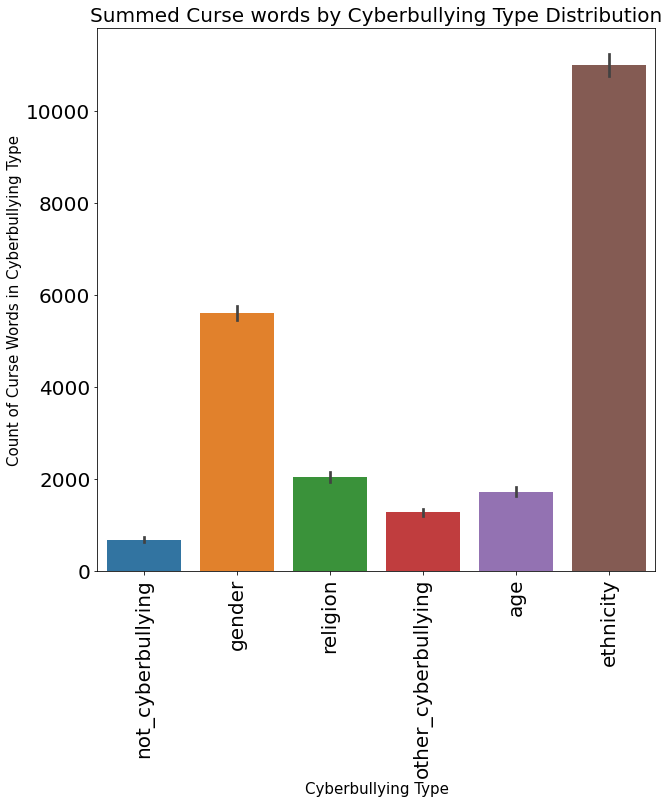

In [48]:
fig = plt.figure(figsize=(10,10), facecolor='white')
sns.barplot(data=df, y="profanity_list_word_count", x="cyberbullying_type",  estimator=sum)
plt.xlabel('Cyberbullying Type', fontsize=15)
plt.ylabel('Count of Curse Words in Cyberbullying Type', fontsize=15)
plt.xticks(fontsize=20, rotation = 90)
plt.yticks(fontsize=20)
plt.title('Summed Curse words by Cyberbullying Type Distribution', fontsize=20)
plt.show()

In [49]:
words = df['clean_txt_emoji'].str.cat(sep=', ').split(" ")
df['word_count'] = df['clean_txt_emoji'].str.split(" ").str.len()


,Unnamed: 0,tweet_text,cyberbullying_type,profanity_list,hashtags,mentions,emoji_names,clean_txt,clean_txt_emoji,tokenized,pos_tags,wordnet_pos,lemmatized,profanity_list_word_count,word_count
29511,29511,"RT @Complex: ISIS to USA: ""...you are being run by an idiot who does not know what Syria or Iraq...",other_cyberbullying,[''],NaN,Complex,NaN,"RT : ISIS USA: ""...you are being run idiot who does not know what Syria Iraq Islam is."" https://...",isis usa you run idiot know syria iraq islam,"['isis', 'usa', 'you', 'run', 'idiot', 'know', 'syria', 'iraq', 'islam']","[('isis', 'NN'), ('usa', 'NN'), ('you', 'PRP'), ('run', 'VBP'), ('idiot', 'RB'), ('know', 'VBP')...","[('isis', 'n'), ('usa', 'n'), ('you', 'n'), ('run', 'v'), ('idiot', 'r'), ('know', 'v'), ('syria...","['isi', 'usa', 'you', 'run', 'idiot', 'know', 'syria', 'iraq', 'islam']",0,10
33925,33925,HOW’S ONE OF THE GIRLS WHO BULLIED ME IN HIGH SCHOOL GONNA CHANGE HER INSTAGRAM BIO TO SAY “spre...,age,[''],NaN,NaN,NaN,HOW’S ONE OF THE GIRLS WHO BULLIED ME IN HIGH SCHOOL GONNA CHANGE HER INSTAGRAM BIO TO SAY “spre...,how one girls bullied high school gonna change instagram bio say spread positivity lmaoooooooooo,"['how', 'one', 'girls', 'bullied', 'high', 'school', 'gon', 'na', 'change', 'instagram', 'bio', ...","[('how', 'WRB'), ('one', 'CD'), ('girls', 'NN'), ('bullied', 'VBD'), ('high', 'JJ'), ('school', ...","[('how', 'n'), ('one', 'n'), ('girls', 'n'), ('bullied', 'v'), ('high', 'a'), ('school', 'n'), (...","['how', 'one', 'girl', 'bully', 'high', 'school', 'gon', 'na', 'change', 'instagram', 'bio', 'sa...",0,15
9562,9562,"RT @victorymonk: @thisonesakillaa @MT8_9 Reminds me of Simpsons where grandpa was screaming ""Dea...",gender,[''],NaN,victorymonk thisonesakillaa MT8_9,NaN,"RT : Reminds Simpsons where grandpa was screaming ""Death!!!"" everything. Now rape. https:…",reminds simpsons grandpa screaming death everything rape,"['reminds', 'simpsons', 'grandpa', 'screaming', 'death', 'everything', 'rape']","[('reminds', 'NNS'), ('simpsons', 'NNS'), ('grandpa', 'VBP'), ('screaming', 'VBG'), ('death', 'N...","[('reminds', 'n'), ('simpsons', 'n'), ('grandpa', 'v'), ('screaming', 'v'), ('death', 'n'), ('ev...","['reminds', 'simpson', 'grandpa', 'scream', 'death', 'everything', 'rape']",0,8
15198,15198,"If you want to be fine with your members encouraging rape, racist jokes and being fine with gay ...",gender,[''],NaN,NaN,NaN,"If you want fine with your members encouraging rape, racist jokes and being fine with gay jokes ...",want fine members encouraging rape racist jokes fine gay jokes deserve,"['want', 'fine', 'members', 'encouraging', 'rape', 'racist', 'jokes', 'fine', 'gay', 'jokes', 'd...","[('want', 'JJ'), ('fine', 'JJ'), ('members', 'NNS'), ('encouraging', 'VBG'), ('rape', 'NN'), ('r...","[('want', 'a'), ('fine', 'a'), ('members', 'n'), ('encouraging', 'v'), ('rape', 'n'), ('racist',...","['want', 'fine', 'member', 'encourage', 'rape', 'racist', 'joke', 'fine', 'gay', 'joke', 'deserve']",0,12
45487,45487,@realDonaldTrump YO DUMB FUCK! STOP YOUR BULLSHIT NOW! YOU ARE **NOT** NIGGER PUTIN! CEASE &amp;...,ethnicity,[''],NaN,realDonaldTrump,NaN,YO DUMB FUCK! STOP YOUR BULLSHIT NOW! YOU ARE **NOT** NIGGER PUTIN! CEASE &amp; DESIST VIOLENCE...,dumb fuck stop bullshit now not nigger putin cease amp desist violence americans face music vete...,"['dumb', 'fuck', 'stop', 'bullshit', 'now', 'not', 'nigger', 'putin', 'cease', 'amp', 'desist', ...","[('dumb', 'JJ'), ('fuck', 'VBD'), ('stop', 'JJ'), ('bullshit', 'NN'), ('now', 'RB'), ('not', 'RB...","[('dumb', 'a'), ('fuck', 'v'), ('stop', 'a'), ('bullshit', 'n'), ('now', 'r'), ('not', 'r'), ('n...","['dumb', 'fuck', 'stop', 'bullshit', 'now', 'not', 'nigger', 'putin', 'cease', 'amp', 'desist', ...",0,29


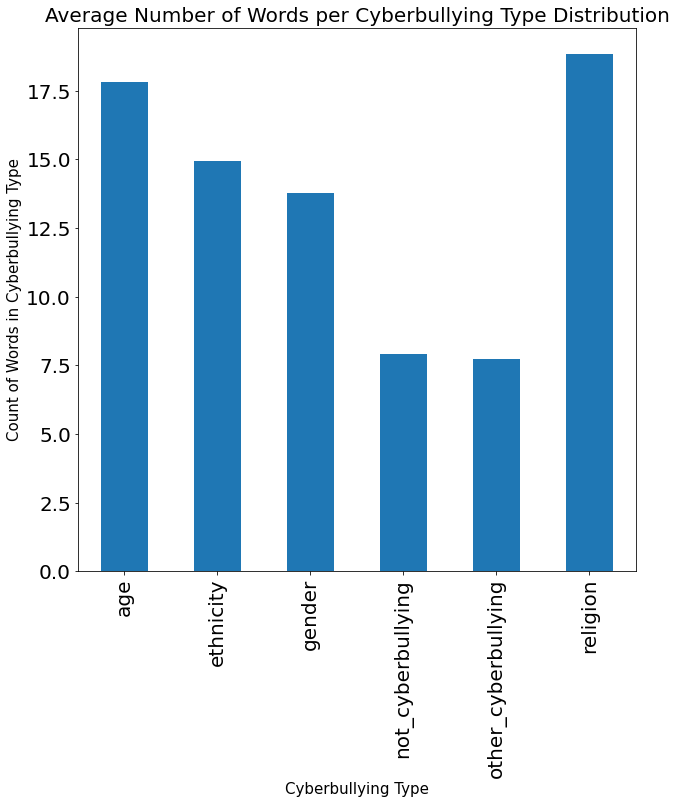

In [50]:
word_avg = df.groupby('cyberbullying_type')['word_count'].mean().plot(kind='bar', figsize=(10,10))
plt.xlabel('Cyberbullying Type', fontsize=15)
plt.ylabel('Count of Words in Cyberbullying Type', fontsize=15)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average Number of Words per Cyberbullying Type Distribution', fontsize=20)
plt.show()

In [51]:
profanity_list_words = df[df['profanity_list']!="['']"]['profanity_list'].astype(str)
final_prof = profanity_list_words.str.cat().replace(",",']').replace("]",',').replace("[",'').strip()
final_prof = ''. join( i for i in final_prof if i not in ['"', " "])
list_final = final_prof.split(',')
list_final= [i.replace("'", "") for i in list_final ]

In [52]:
def most_common_curse(number, class_name = None):
    allwords = []

    if class_name is None:
        title = f'Top {number} Most Common Curse Words in the data'
        allwords = list_final
    else:
        title = f'Top {number} Most Common Curse Words in Class {class_name}'
        class_name = "age"
        data_set = df.query(f'cyberbullying_type=="{class_name}"')
        profanity_list_words = data_set[data_set['profanity_list']!="['']"]['profanity_list'].astype(str)
        final_prof = profanity_list_words.str.cat().replace(",",']').replace("]",',').replace("[",'').strip()
        final_prof = ''. join( i for i in final_prof if i not in ['"', " "])
        list_finall = final_prof.split(',')
        allwords= [i.replace("'", "") for i in list_finall ]

        #allwords = df.query(f'cyberbullying_type=="{class_name}"')['clean_txt_emoji'].str.cat().split(" ")
        
    mostcommon = FreqDist(allwords).most_common(number)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(mostcommon))
    fig = plt.figure(figsize=(10,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout(pad=0)
    plt.show()
    return "====================="
    

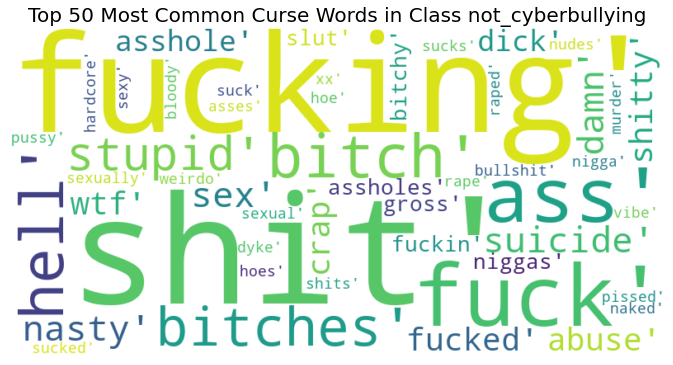

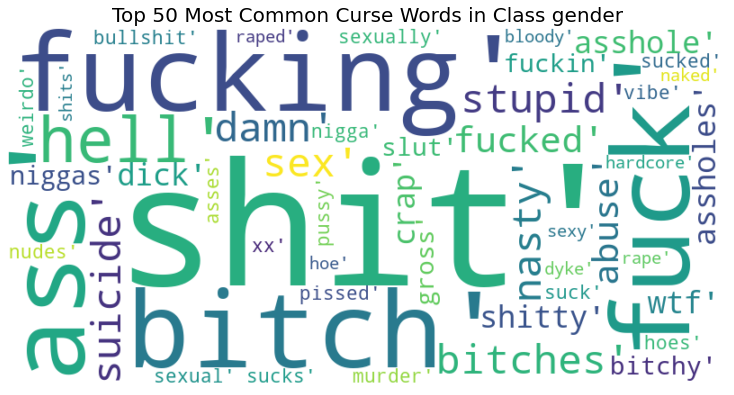

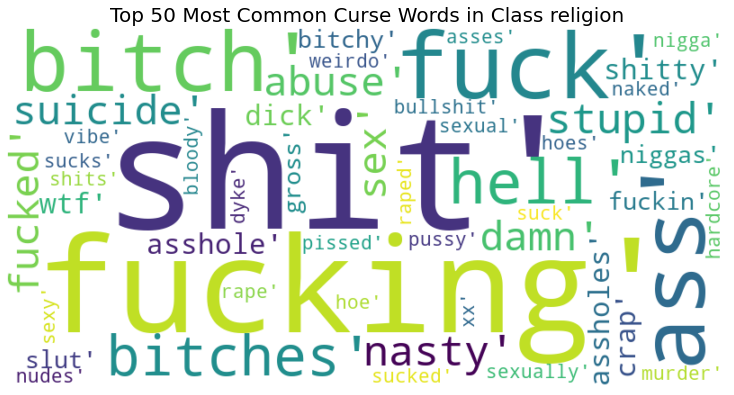

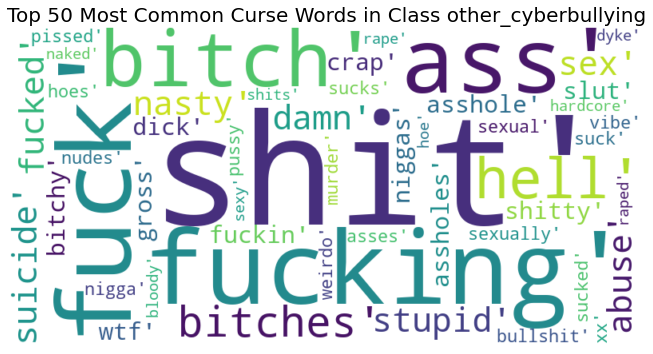

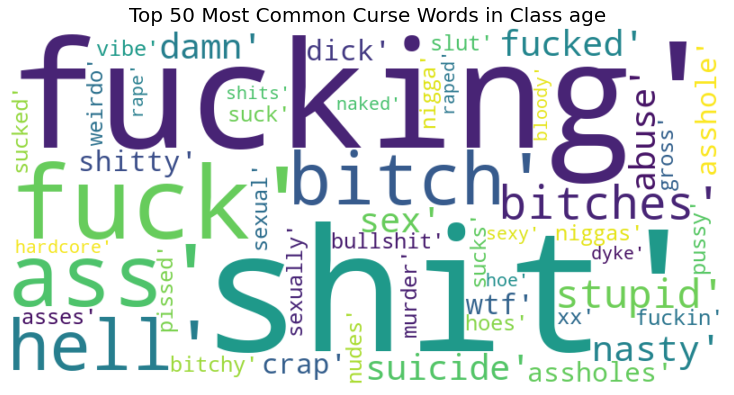

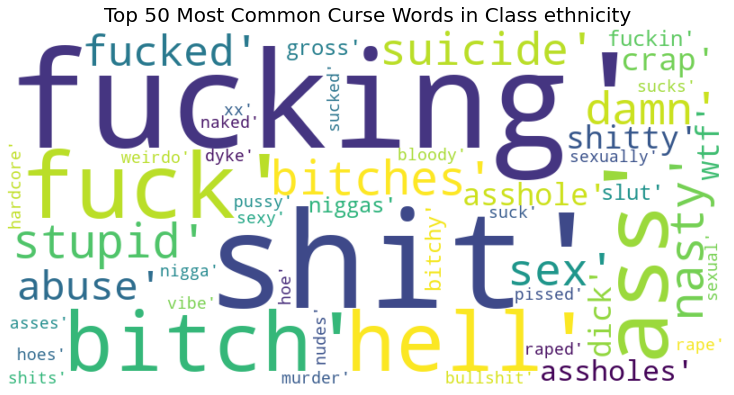

In [53]:
for class_name in list(df['cyberbullying_type'].unique()):
    print(most_common_curse(50, class_name))

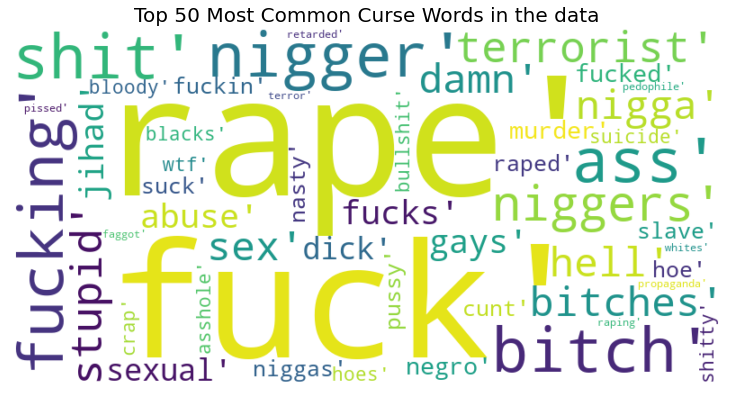

In [54]:
print(most_common_curse(50))

### Term Frequency Analysis

In [55]:
def most_common(number, class_name = None):
    allwords = []
    if class_name is None:
        title = f'Top {number} Most Common Words in the data'
        allwords = words
    else:
        title = f'Top {number} Most Common Words in Class {class_name}'
        allwords = df.query(f'cyberbullying_type=="{class_name}"')['clean_txt_emoji'].str.cat().split(" ")
        
    mostcommon = FreqDist(allwords).most_common(number)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(str(mostcommon))
    fig = plt.figure(figsize=(10,10), facecolor='white')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.tight_layout(pad=0)
    plt.show()
    return "====================="
    

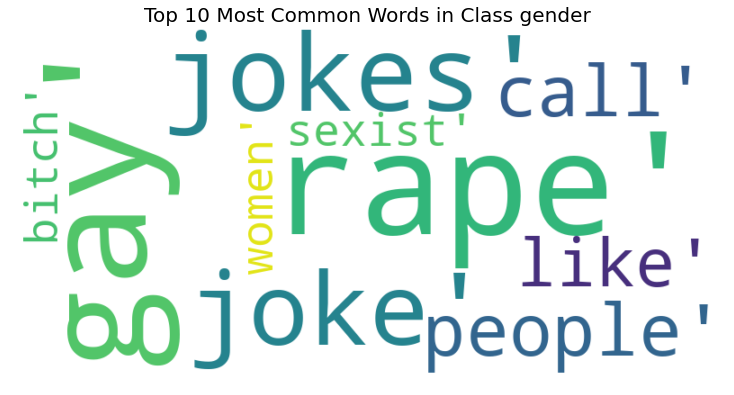

'====================='

In [56]:
most_common( 10, 'gender')

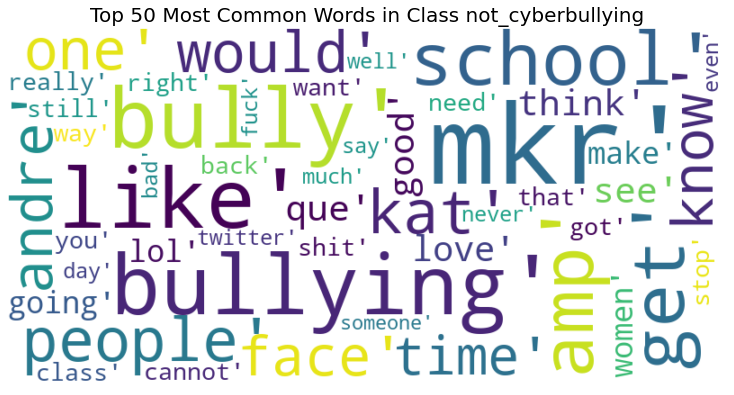

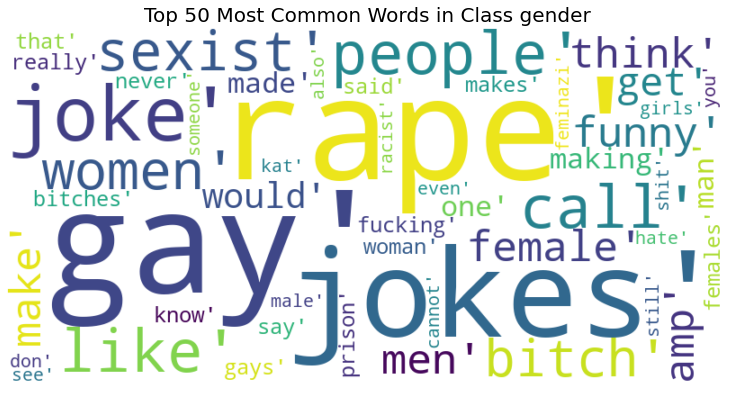

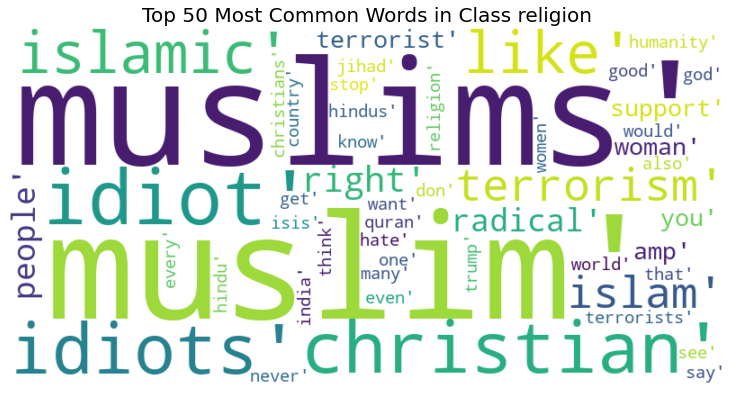

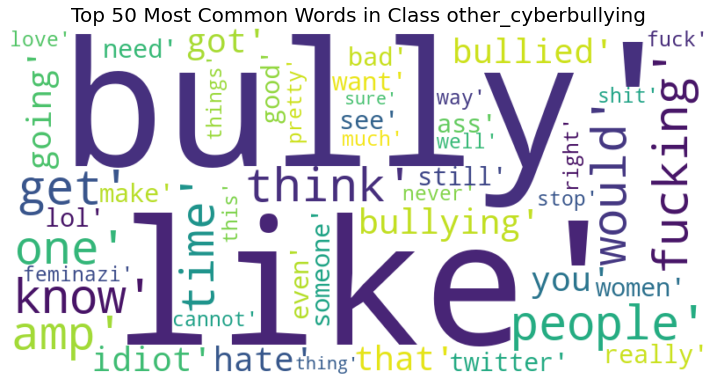

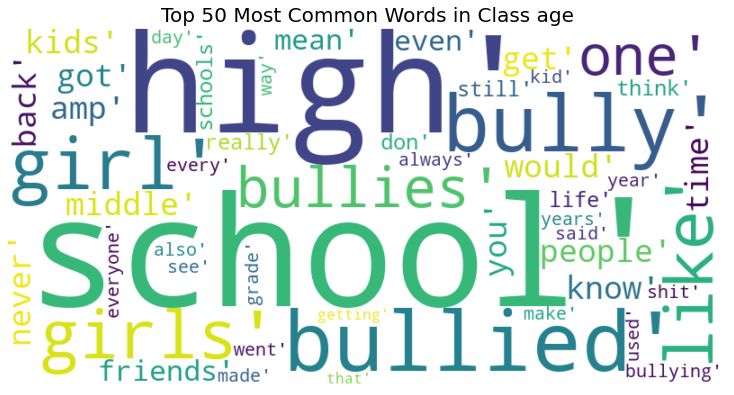

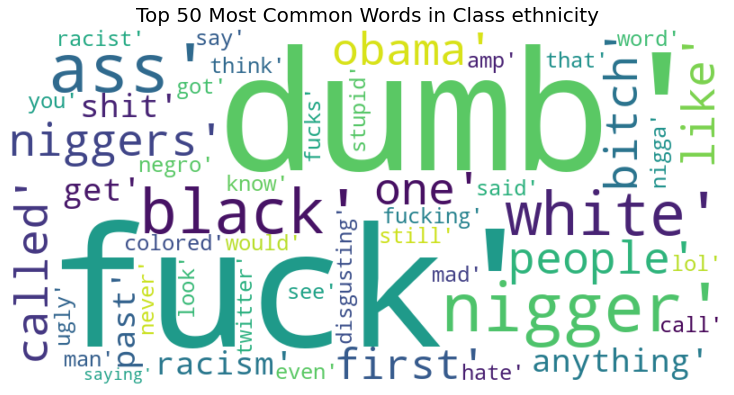

In [57]:
for class_name in list(df['cyberbullying_type'].unique()):
    print(most_common( 50, class_name))

## Topic Modeling

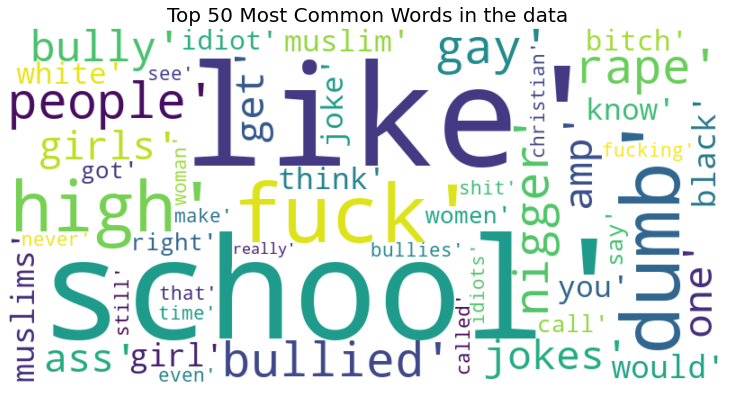

'====================='

In [58]:
most_common(50)